***Problem Statement :***
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- **Which variables are significant in predicting the price of a house, and**
- **How well those variables describe the price of a house.**

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Step 1: Reading and Understanding the Data**

In [380]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [381]:
data = pd.read_csv(r'C:\Users\Nivass\Downloads\Upgrad\ML-2\Advanced LR\train.csv', encoding = 'latin')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [382]:
data.shape

(1460, 81)

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [384]:
pd.set_option('display.max_rows', 100)
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [385]:
data.isnull().sum().sum()/len(data)

4.77054794520548

In [386]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Step 2: Data Cleaning**

In [387]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [388]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [389]:
#Checking the shape of the dataframe
data.shape

(1460, 81)

Removing/Imputing NaN values in Categorical attributes

In [390]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [391]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    data[col]=data[col].fillna('None')

In [392]:
data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [393]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [394]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [395]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

We can fill the Median values for these columns to eliminate null values

In [396]:
data['LotFrontage'].fillna(data["LotFrontage"].median(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

# Now that the data set is cleaned , we can do initial EDA on the data 

In [397]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [398]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Target variable 'sale Price' vs a few select columns(Variables which i think is important)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

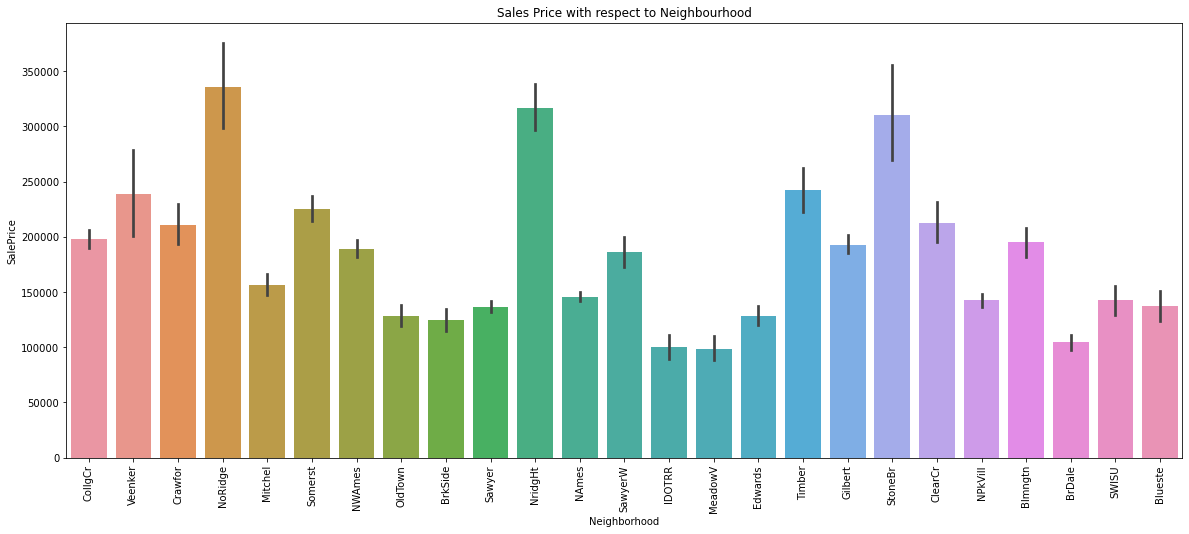

In [399]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

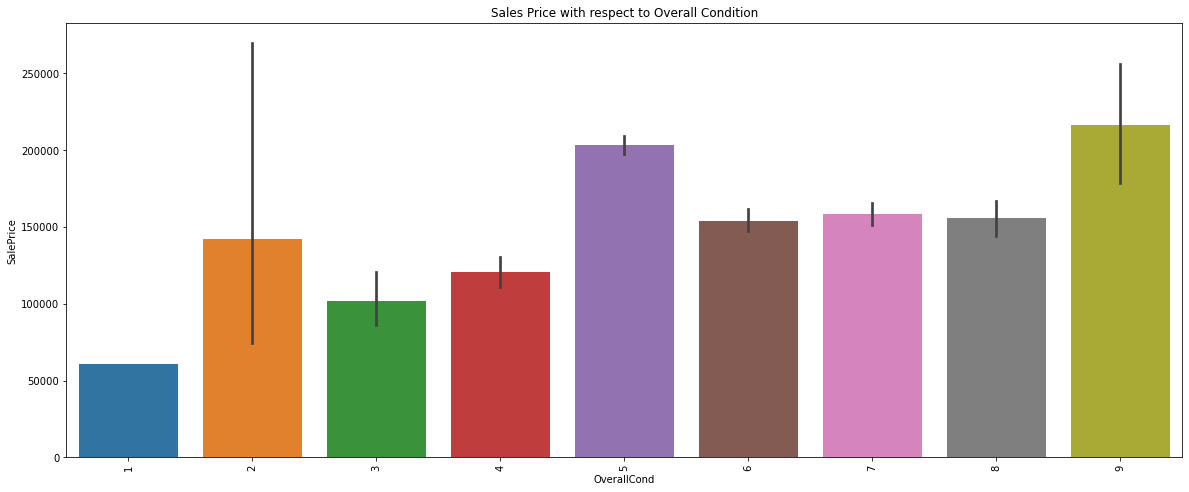

In [400]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

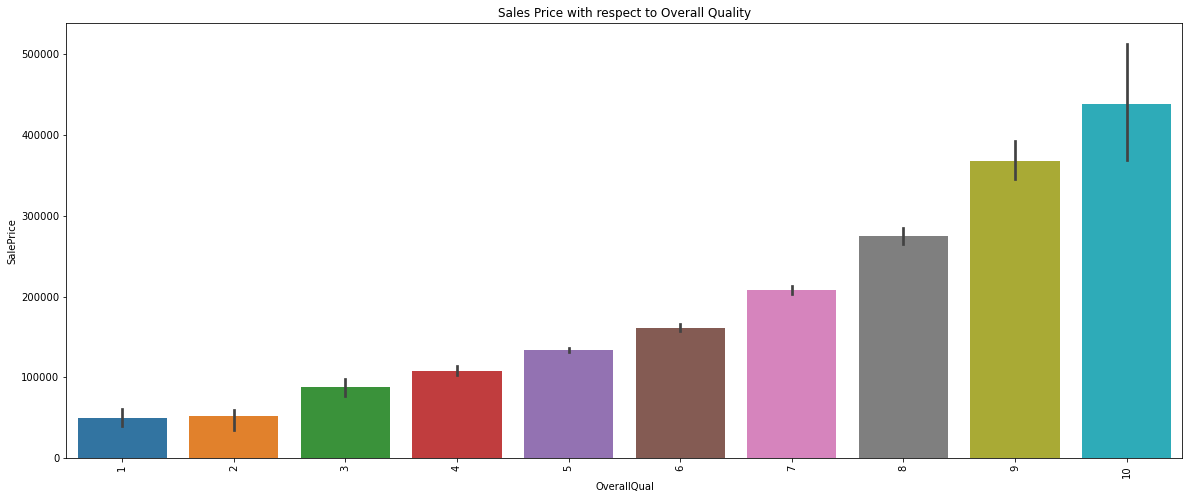

In [401]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

## Observation

- **Properties in some of the Neighborhoods are high priced.**
- **Increase in the overall quality has a direct positive effect on the sale price**

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

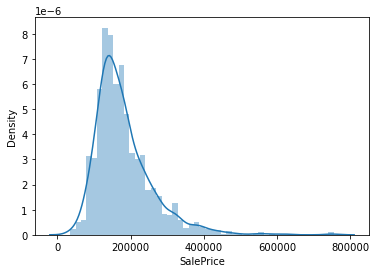

In [402]:
sns.distplot(data['SalePrice'])

In [403]:
data_raw = data.copy

### Since it is left skewed, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

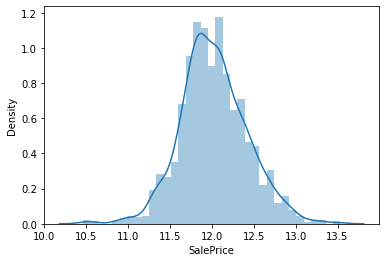

In [404]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])

sns.distplot(data['SalePrice'])

The target value seems to be normalized with some noise.

In [405]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


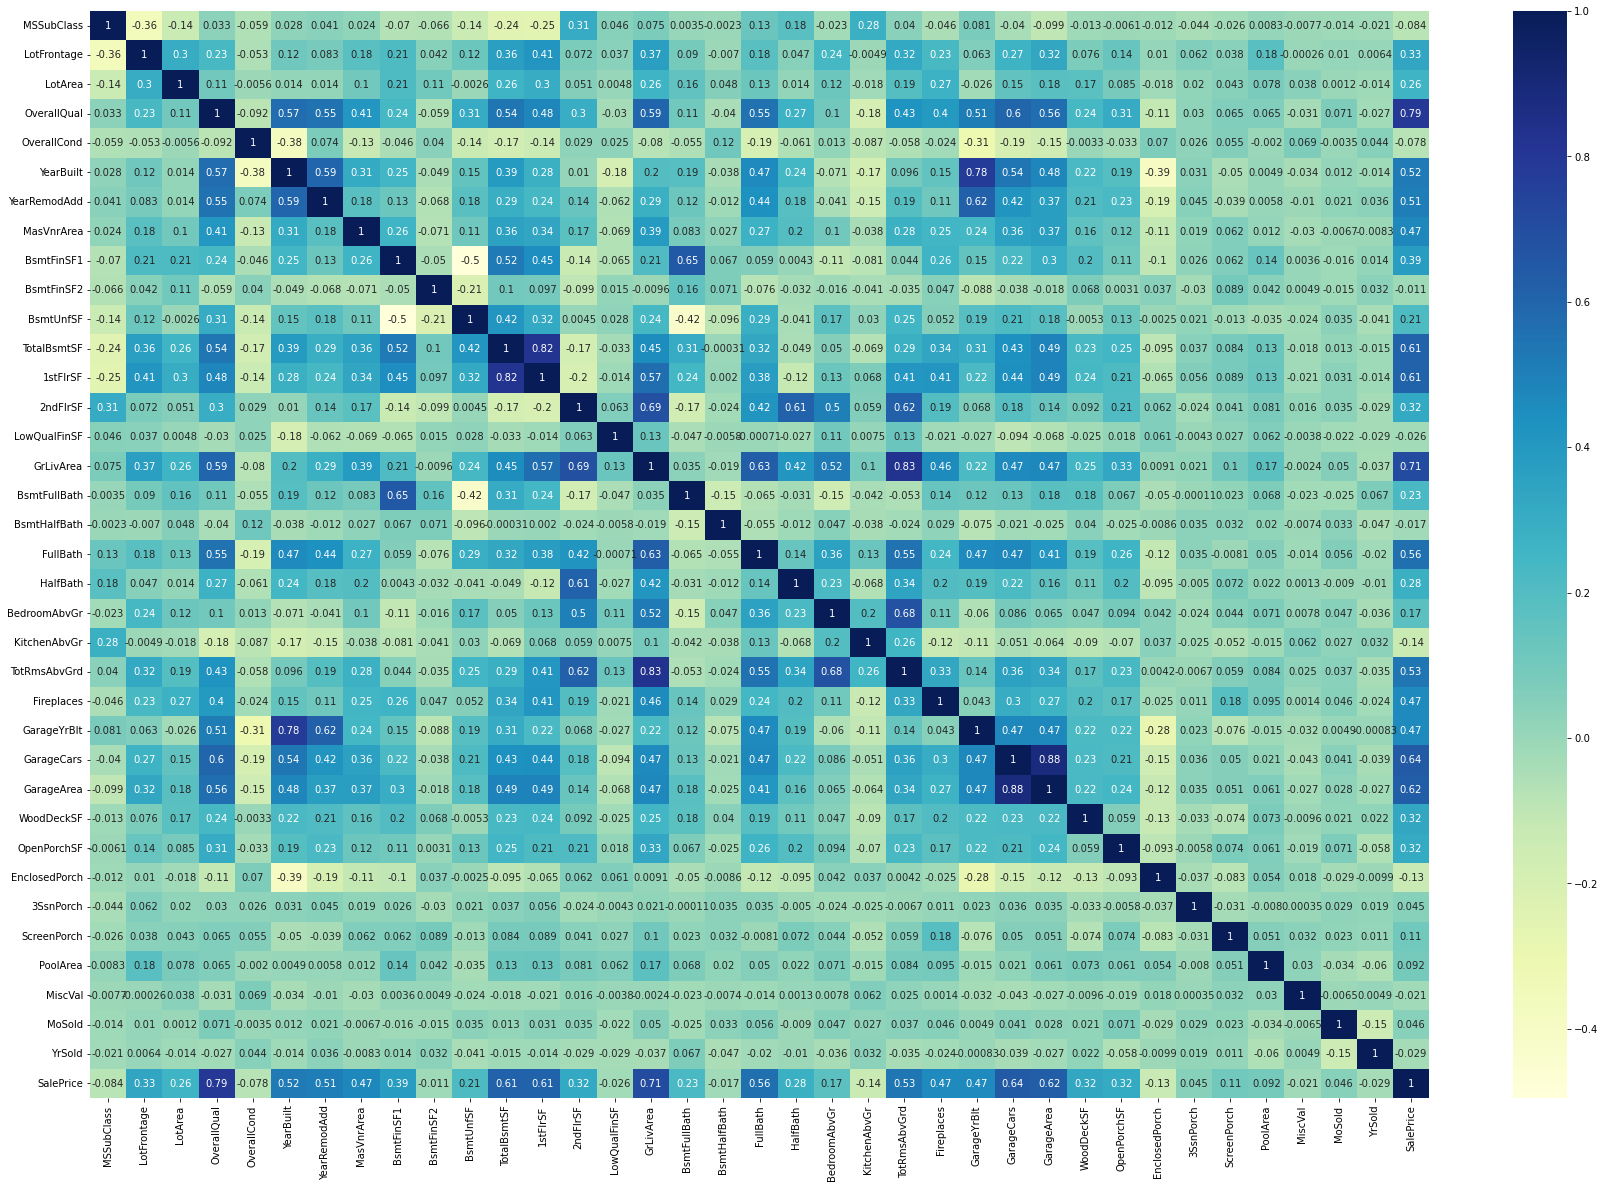

In [406]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

We can see that some of the variables are correlated

Before dropping these columns, we will first check their pair plots


<Figure size 720x360 with 0 Axes>

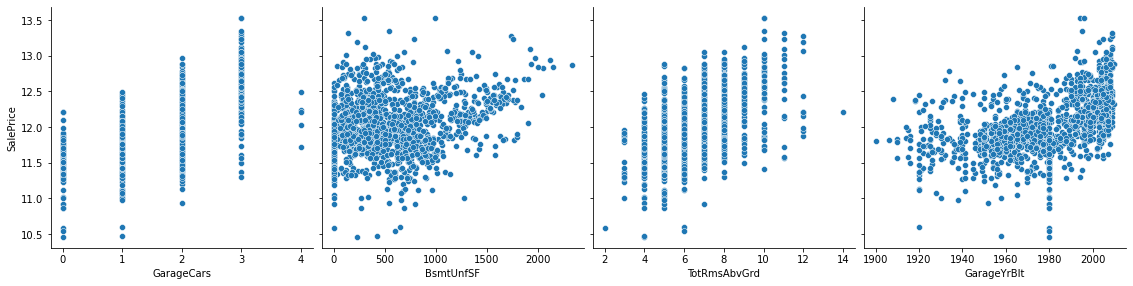

In [407]:
plt.figure(figsize=(10,5))
sns.pairplot(data, x_vars=['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

plt.show()

Droping column these columns as there are not contributing to 'SalePrice'

In [408]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [409]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,12.429220,8


Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [410]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,WD,Normal,12.429220,8


#### Remove numerical attributes that have more than 85% data associated to one value.


- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [411]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
data.drop(columnsToBeRemoved, axis = 1, inplace = True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,Y,0,61,None,None,None,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,Y,298,0,None,None,None,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,Y,0,42,None,None,None,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,Y,0,35,None,None,None,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,Y,192,84,None,None,None,WD,Normal,12.429220,8


In [412]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [413]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [414]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [415]:
data.shape

(1460, 63)

# Data Preparations

Let's now prepare the data and build the model.

In [416]:
data = data.drop(['Id'], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0,61,None,None,None,WD,Normal,12.247699,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,Y,298,0,None,None,None,WD,Normal,12.109016,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0,42,None,None,None,WD,Normal,12.317171,7
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,0,35,None,None,None,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,192,84,None,None,None,WD,Normal,12.429220,8


# From data dictionary we can see that there are many ordinal variable in the data set , now we handle these as the order is very important

In [417]:
data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['d_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['d_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['d_Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
data['d_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['d_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['d_SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,5,4,3,2,1,4,0,2,1,1


In [418]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

data = data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,LandSlope,Neighborhood,Condition1,Condition2,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,None,Lvl,Gtl,CollgCr,Norm,Norm,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,None,Lvl,Gtl,Veenker,Feedr,Norm,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,None,Lvl,Gtl,CollgCr,Norm,Norm,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,None,Lvl,Gtl,Crawfor,Norm,Norm,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,None,Lvl,Gtl,NoRidge,Norm,Norm,...,5,4,3,2,1,4,0,2,1,1


### For the following categorical columns we  create dummies

In [419]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

int64      33
object     26
float64     3
Name: 0, dtype: int64

In [420]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Alley', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']


In [421]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,856,856,854,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,0.0,216,756,961,756,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,1


# Train Test Split

In [422]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,856,856,854,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,0.0,216,756,961,756,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,1


In [423]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling the features

In [424]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=195)

In [425]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Recursive feature elimination (RFE)


Since there are around 195 features, we will use RFE to get the best 80 features out of the 196 features and use the new
features for further analysis

In [426]:
# Running RFE with the output number of the variable equal to 80

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 80)            
rfe = rfe.fit(X_train, y_train)

In [427]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,BsmtFullBath,True,1
7,HalfBath,True,1
8,Fireplaces,True,1
9,GarageArea,True,1


In [428]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [429]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

RIDGE REGRESSION

In [430]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 80)
y_train (1021,)


In [431]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [432]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.076222,-0.091891,1
15,4.0,-0.076011,-0.091895,2
17,6.0,-0.076437,-0.091906,3
14,3.0,-0.075802,-0.091930,4
18,7.0,-0.076650,-0.091944,5
19,8.0,-0.076856,-0.091993,6
13,2.0,-0.075595,-0.092025,7
20,9.0,-0.077055,-0.092048,8
21,10.0,-0.077248,-0.092105,9
12,1.0,-0.075403,-0.092222,10


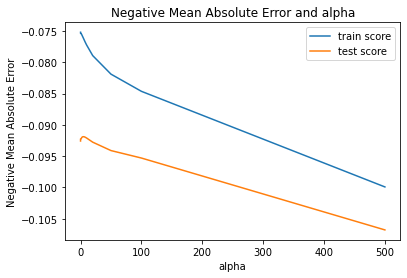

In [433]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [434]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [435]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.40804234e-02,  8.47540166e-02,  5.11945059e-02,  2.02169877e-02,
        3.79970632e-02,  1.24341741e-01,  2.35619462e-02,  1.11937933e-02,
        2.64355755e-02,  3.77576219e-02, -6.97521717e-02,  3.63814544e-02,
        1.46931968e-02, -2.77196782e-02,  4.40566755e-02,  2.36565333e-02,
        9.45918410e-02,  5.00418449e-02, -1.96695623e-02, -2.11650104e-02,
       -1.58076151e-02, -1.75246649e-02, -1.40271304e-02, -2.87016892e-02,
       -1.83769346e-02, -1.16172614e-02, -1.30128078e-02,  2.15233367e-02,
        1.19440097e-02,  1.13607719e-02,  0.00000000e+00, -3.42534403e-02,
       -2.60566818e-03,  0.00000000e+00, -3.56458229e-02, -2.89228193e-02,
        2.90143739e-01, -8.00256153e-32,  5.65567857e-02,  6.03835096e-02,
        1.93239908e-01,  1.23559289e-01,  1.41435577e-01, -1.36938706e-02,
       -1.41445251e-03, -1.59763070e-02, -8.13381774e-32, -1.29129543e-02,
       -1.58944368e-02, -2.69450513e-02, -1.41445251e-03,  1.79922339e-02,
        2.03945461e-02,  

In [436]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))


0.02792699496835376

In [437]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', 0.014),
 ('LotFrontage', 0.085),
 ('LotArea', 0.051),
 ('OverallQual', 0.02),
 ('OverallCond', 0.038),
 ('MasVnrArea', 0.124),
 ('BsmtFinSF1', 0.024),
 ('TotalBsmtSF', 0.011),
 ('1stFlrSF', 0.026),
 ('2ndFlrSF', 0.038),
 ('GrLivArea', -0.07),
 ('BsmtFullBath', 0.036),
 ('FullBath', 0.015),
 ('HalfBath', -0.028),
 ('BedroomAbvGr', 0.044),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.095),
 ('WoodDeckSF', 0.05),
 ('OpenPorchSF', -0.02),
 ('PropAge', -0.021),
 ('d_LotShape', -0.016),
 ('d_ExterQual', -0.018),
 ('d_BsmtQual', -0.014),
 ('d_BsmtExposure', -0.029),
 ('d_BsmtFinType1', -0.018),
 ('d_HeatingQC', -0.012),
 ('d_KitchenQual', -0.013),
 ('d_FireplaceQu', 0.022),
 ('d_GarageFinish', 0.012),
 ('d_BldgType', 0.011),
 ('d_HouseStyle', 0.0),
 ('d_Fence', -0.034),
 ('d_LotConfig', -0.003),
 ('d_MasVnrType', 0.0),
 ('d_SaleCondition', -0.036),
 ('MSZoning_FV', -0.029),
 ('MSZoning_RH', 0.29),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.057),
 ('Alley_No

In [438]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0141,
 'OverallQual': 0.0848,
 'OverallCond': 0.0512,
 'BsmtFinSF1': 0.0202,
 'TotalBsmtSF': 0.038,
 'GrLivArea': 0.1243,
 'BsmtFullBath': 0.0236,
 'HalfBath': 0.0112,
 'Fireplaces': 0.0264,
 'GarageArea': 0.0378,
 'PropAge': -0.0698,
 'd_BsmtQual': 0.0364,
 'd_BsmtExposure': 0.0147,
 'd_BldgType': -0.0277,
 'MSZoning_FV': 0.0441,
 'MSZoning_RH': 0.0237,
 'MSZoning_RL': 0.0946,
 'MSZoning_RM': 0.05,
 'Neighborhood_CollgCr': -0.0197,
 'Neighborhood_Edwards': -0.0212,
 'Neighborhood_Gilbert': -0.0158,
 'Neighborhood_MeadowV': -0.0175,
 'Neighborhood_Mitchel': -0.014,
 'Neighborhood_NAmes': -0.0287,
 'Neighborhood_NWAmes': -0.0184,
 'Neighborhood_Sawyer': -0.0116,
 'Neighborhood_SawyerW': -0.013,
 'Condition1_Norm': 0.0215,
 'Condition1_PosN': 0.0119,
 'Condition2_Feedr': 0.0114,
 'Condition2_PosA': 0.0,
 'Condition2_PosN': -0.0343,
 'Condition2_RRAe': -0.0026,
 'Condition2_RRNn': 0.0,
 'RoofStyle_Gable': -0.0356,
 'RoofStyle_Hip': -0.0289,
 'RoofMatl_CompShg': 0.2901,
 'Roo

In [449]:
# ridge regression
lm = Ridge(alpha=5)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9237810383130041
0.8353787663529734


In [450]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.16711371867190844


In [451]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [452]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,12.024
37,MSZoning_RH,0.290
41,Alley_Pave,0.193
43,LandContour_Low,0.141
42,LandContour_HLS,0.124
6,MasVnrArea,0.124
17,GarageArea,0.095
2,LotFrontage,0.085
40,Alley_None,0.060
39,MSZoning_RM,0.057


In [453]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,12.024
37,MSZoning_RH,0.290
41,Alley_Pave,0.193
43,LandContour_Low,0.141
42,LandContour_HLS,0.124
6,MasVnrArea,0.124
17,GarageArea,0.095
2,LotFrontage,0.085
40,Alley_None,0.060
39,MSZoning_RM,0.057


In [454]:
paraRFE.shape

(81, 2)

# LASSO REGRESSION

In [457]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 80)
y_train (1021,)


In [458]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [459]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.156282,0.091422,0.010184,0.004158,0.0001,{'alpha': 0.0001},-0.083089,-0.111639,-0.091119,-0.077225,...,-0.092283,0.012033,2,-0.076434,-0.073739,-0.073327,-0.077061,-0.076548,-0.075422,0.001562
1,0.045474,0.013352,0.009780,0.002131,0.001,{'alpha': 0.001},-0.082229,-0.111859,-0.091928,-0.078999,...,-0.091895,0.011531,1,-0.078444,-0.075201,-0.075098,-0.079000,-0.078483,-0.077245,0.001722
2,0.016548,0.002050,0.008974,0.002519,0.01,{'alpha': 0.01},-0.097785,-0.115114,-0.108805,-0.094593,...,-0.101651,0.008844,3,-0.097184,-0.082862,-0.096206,-0.099082,-0.098988,-0.094864,0.006100
3,0.014770,0.002629,0.007771,0.000756,0.05,{'alpha': 0.05},-0.123334,-0.139608,-0.147911,-0.127842,...,-0.131568,0.010656,4,-0.132115,-0.114598,-0.130293,-0.131774,-0.131592,-0.128074,0.006766
4,0.015935,0.002515,0.010195,0.000771,0.1,{'alpha': 0.1},-0.160929,-0.168109,-0.191233,-0.161732,...,-0.167018,0.013012,5,-0.171984,-0.152924,-0.167250,-0.167093,-0.168901,-0.165630,0.006592


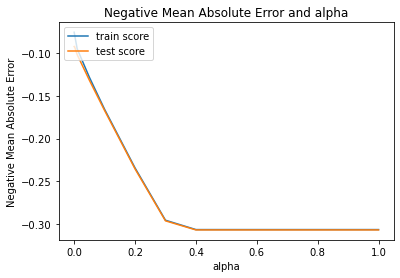

In [460]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [462]:
# get the best estimator for lambda

model_cv.best_estimator_

Lasso(alpha=0.001)

In [480]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 1.14909389e-02,  1.24588707e-01,  3.39871416e-02,  0.00000000e+00,
        4.53194694e-04,  1.13723802e-01,  2.43271117e-02,  0.00000000e+00,
        2.90070800e-02,  4.77844586e-02, -4.81056632e-02,  2.75558305e-02,
        1.52936311e-02, -1.45860057e-02,  0.00000000e+00, -0.00000000e+00,
        6.16344286e-04, -2.94037910e-02, -0.00000000e+00, -7.41768159e-03,
       -0.00000000e+00, -1.59392375e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.44061981e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.61841267e-02,
        0.00000000e+00,  0.00000000e+00, -4.65459440e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.18833997e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.91769997e-02,  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [481]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', 0.011),
 ('LotFrontage', 0.125),
 ('LotArea', 0.034),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.114),
 ('BsmtFinSF1', 0.024),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.048),
 ('GrLivArea', -0.048),
 ('BsmtFullBath', 0.028),
 ('FullBath', 0.015),
 ('HalfBath', -0.015),
 ('BedroomAbvGr', 0.0),
 ('Fireplaces', -0.0),
 ('GarageArea', 0.001),
 ('WoodDeckSF', -0.029),
 ('OpenPorchSF', -0.0),
 ('PropAge', -0.007),
 ('d_LotShape', -0.0),
 ('d_ExterQual', -0.002),
 ('d_BsmtQual', -0.0),
 ('d_BsmtExposure', -0.0),
 ('d_BsmtFinType1', -0.0),
 ('d_HeatingQC', -0.0),
 ('d_KitchenQual', -0.0),
 ('d_FireplaceQu', 0.014),
 ('d_GarageFinish', 0.0),
 ('d_BldgType', 0.0),
 ('d_HouseStyle', 0.0),
 ('d_Fence', -0.016),
 ('d_LotConfig', 0.0),
 ('d_MasVnrType', 0.0),
 ('d_SaleCondition', -0.005),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('Alley_None', 0.0),
 ('Alley_Pave', 0.0)

In [482]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8676728613684148
0.8769017160307481


In [483]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1445090935296301


#### The R2 values for Train and Test matches well, indicating an optimum model

In [484]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.024
1,MSSubClass,0.011
2,LotFrontage,0.125
3,LotArea,0.034
4,OverallQual,0.000


In [485]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.024
2,LotFrontage,0.125
6,MasVnrArea,0.114
10,2ndFlrSF,0.048
3,LotArea,0.034
9,1stFlrSF,0.029
12,BsmtFullBath,0.028
7,BsmtFinSF1,0.024
53,Neighborhood_Edwards,0.019
57,Neighborhood_Mitchel,0.016


In [486]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.024
2,LotFrontage,0.125
6,MasVnrArea,0.114
10,2ndFlrSF,0.048
3,LotArea,0.034
9,1stFlrSF,0.029
12,BsmtFullBath,0.028
7,BsmtFinSF1,0.024
53,Neighborhood_Edwards,0.019
57,Neighborhood_Mitchel,0.016


In [491]:
# These 28 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(28, 2)

# Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 5
- Lasso - 0.0001

The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.016
- Lasso - 0.014

The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, GrLivArea type of the house, LotFrontage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above table as significant variables for predicting the price of a house.